In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv("boston.csv")

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [2]:
# New labels assigned but they are replaced in a new df

boston_new = boston.copy()
boston_new.rename(columns={'crim': 'Crime',
                           'zn': '%Lots', 
                           'indus': '%Industry/Retail', 
                           'chas': 'On River(Y/N)', 
                           'nox': 'Pollution', 
                           'rooms': '#Room/Home', 
                           'age': "%built before built '40", 
                           'dis': 'Dist to Emp Centre', 
                           'rad': 'Access to Hwy', 
                           'ptratio': 'Pupil/teacher', 
                           'lstat': '%lower socio-eco status', 
                           'mv': 'Med. Value'}, inplace=True)
print(boston_new)



       Crime  %Lots  %Industry/Retail  On River(Y/N)  Pollution  #Room/Home  \
0    0.00632   18.0              2.31              0      0.538       6.575   
1    0.02731    0.0              7.07              0      0.469       6.421   
2    0.02729    0.0              7.07              0      0.469       7.185   
3    0.03237    0.0              2.18              0      0.458       6.998   
4    0.06905    0.0              2.18              0      0.458       7.147   
..       ...    ...               ...            ...        ...         ...   
501  0.06263    0.0             11.93              0      0.573       6.593   
502  0.04527    0.0             11.93              0      0.573       6.120   
503  0.06076    0.0             11.93              0      0.573       6.976   
504  0.10959    0.0             11.93              0      0.573       6.794   
505  0.04741    0.0             11.93              0      0.573       6.030   

     %built before built '40  Dist to Emp Centre  A

In [3]:

print('\nGeneral description of the boston DataFrame:')
print(boston_new.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston_new.describe())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crime                    506 non-null    float64
 1   %Lots                    506 non-null    float64
 2   %Industry/Retail         506 non-null    float64
 3   On River(Y/N)            506 non-null    int64  
 4   Pollution                506 non-null    float64
 5   #Room/Home               506 non-null    float64
 6   %built before built '40  506 non-null    float64
 7   Dist to Emp Centre       506 non-null    float64
 8   Access to Hwy            506 non-null    int64  
 9   tax                      506 non-null    int64  
 10  Pupil/teacher            506 non-null    float64
 11  %lower socio-eco status  506 non-null    float64
 12  Med. Value               506 non-null    float64
dtypes: float64(10), int64(3)
memory us

In [4]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



Data dimensions: (506, 13)


In [5]:
boston_new.corr()

,Crime,%Lots,%Industry/Retail,On River(Y/N),Pollution,#Room/Home,%built before built '40,Dist to Emp Centre,Access to Hwy,tax,Pupil/teacher,%lower socio-eco status,Med. Value
Crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582
%Lots,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386
%Industry/Retail,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754
On River(Y/N),-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663
Pollution,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300
#Room/Home,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304
%built before built '40,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999
Dist to Emp Centre,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315
Access to Hwy,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979



Histogram of the Prelim Model Data of Boston DataFrame:


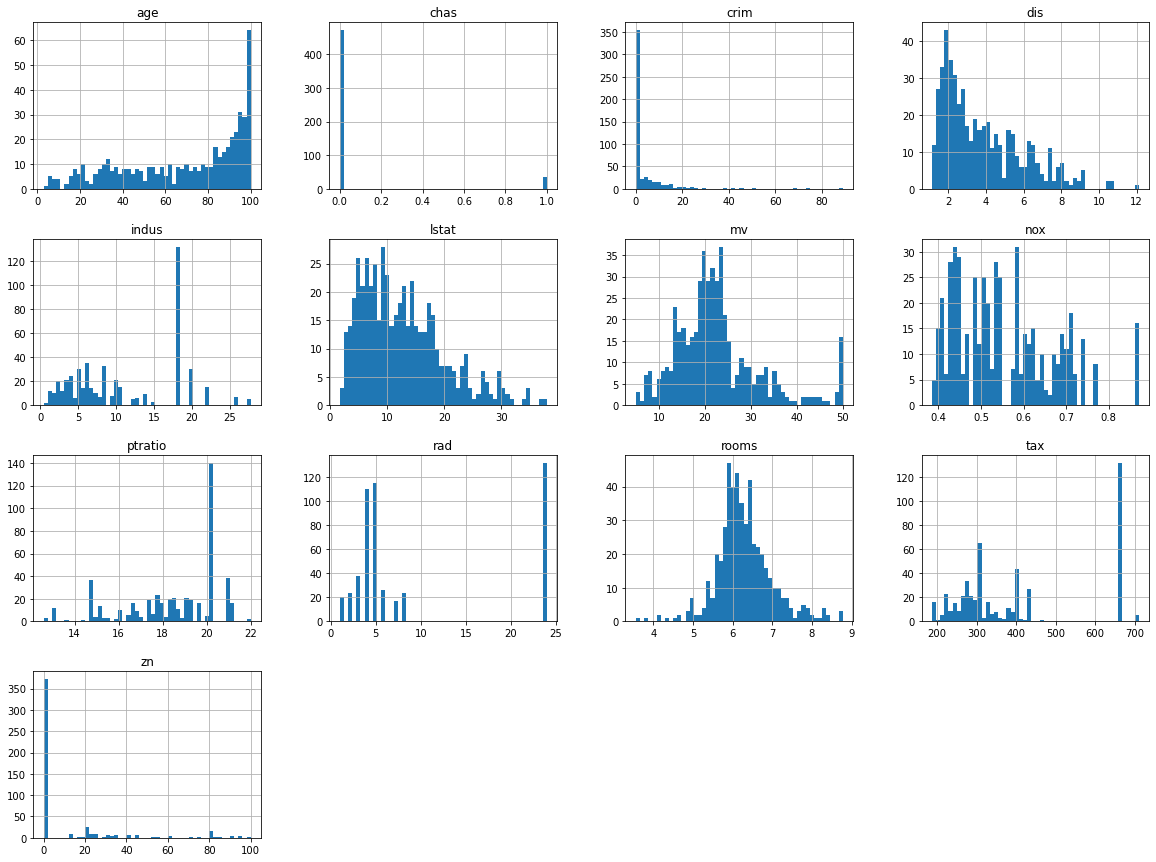

In [6]:
# histogram of prelim data
print('\nHistogram of the Prelim Model Data of Boston DataFrame:')
import matplotlib.pyplot as plt
boston_prelim=pd.DataFrame(prelim_model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_prelim.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

StandardScaler()
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)



Histogram of the Scaled Model Data of Boston DataFrame:


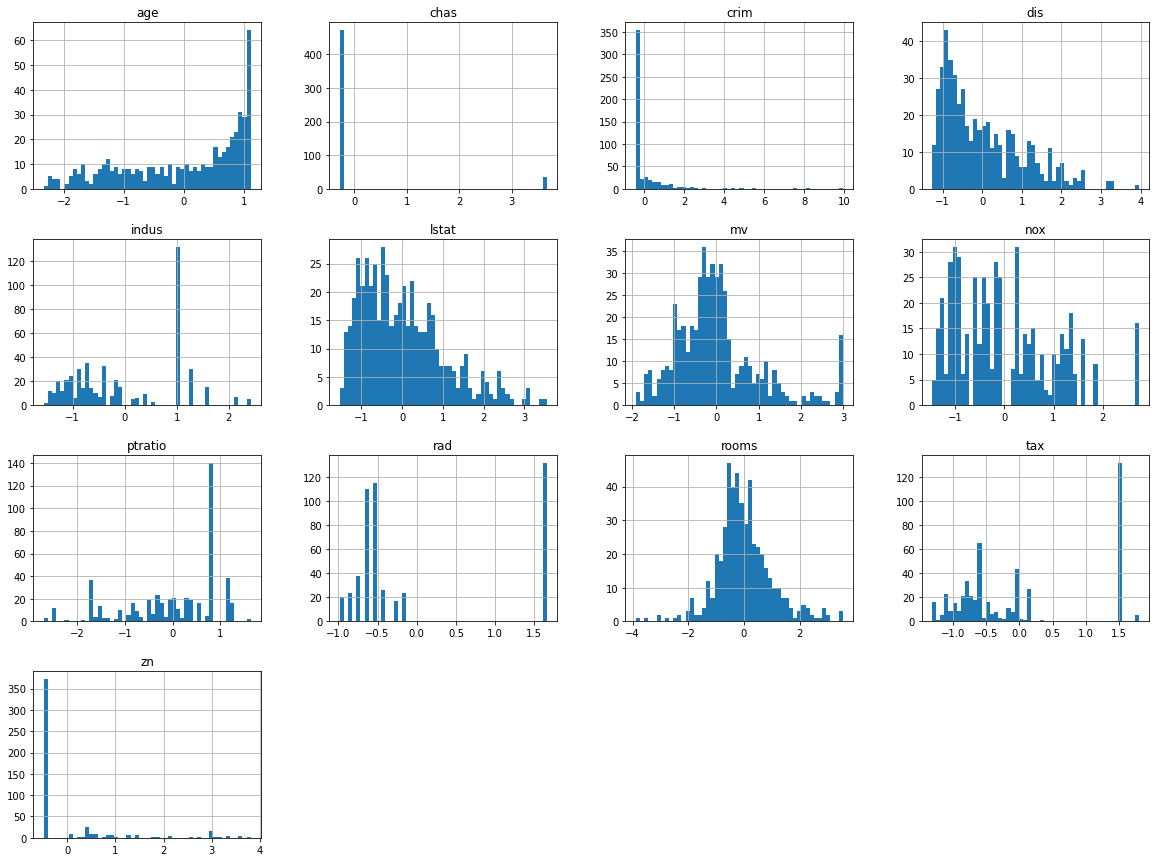

In [8]:
# histogram of scaled model data
print('\nHistogram of the Scaled Model Data of Boston DataFrame:')
boston_scaled=pd.DataFrame(model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix=boston_scaled.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

In [10]:
import seaborn as sns
sns.set(style='darkgrid')

/Users/jasminesamuel/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


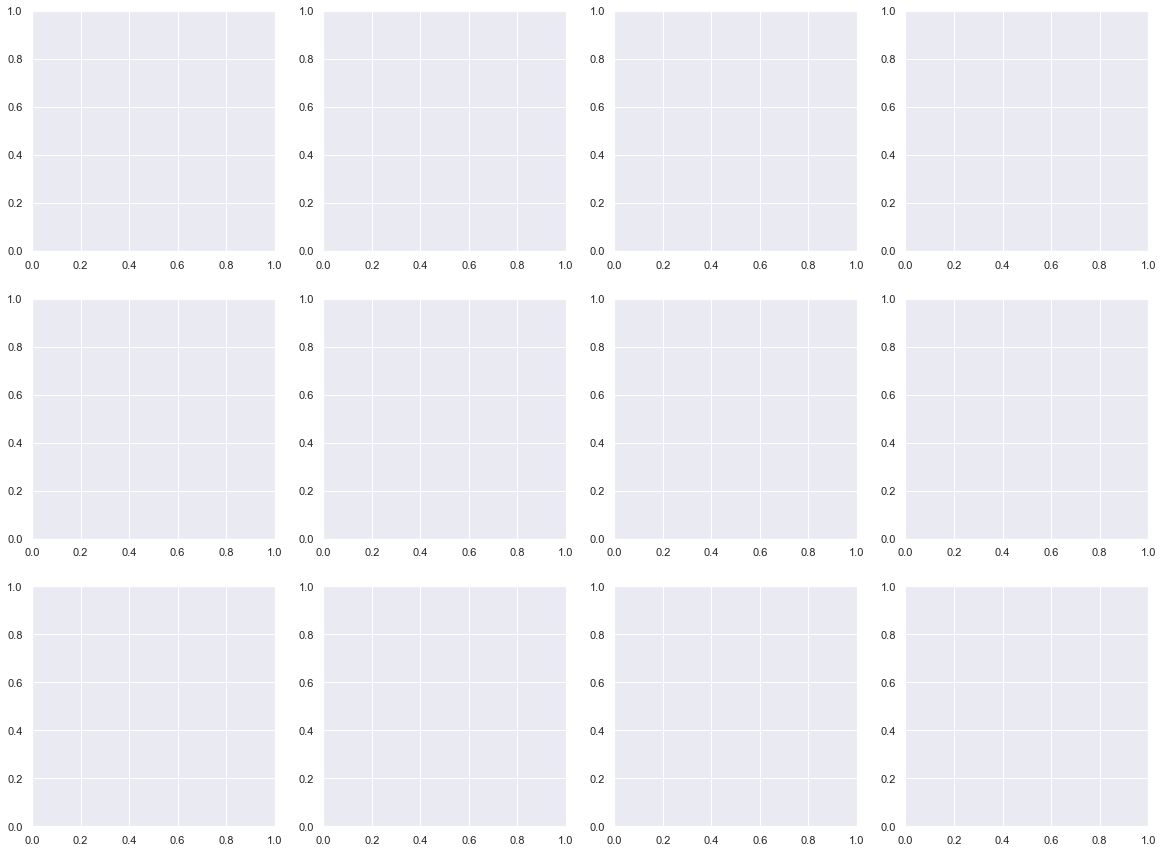

In [11]:
fig,axs=plt.subplots(nrows=3, ncols=4,figsize=(20,15))
g1=sns.relplot(x='rooms',y='mv',data=boston_scaled,ax=axs[0,0])
g2=sns.relplot(x='zn',y='mv',data=boston_scaled,ax=axs[0,1])
g3=sns.relplot(x='dis',y='mv',data=boston_scaled,ax=axs[0,2])
g4=sns.relplot(x='chas',y='mv',data=boston_scaled,ax=axs[0,3])
g5=sns.relplot(x='age',y='mv',data=boston_scaled,ax=axs[1,0])
g6=sns.relplot(x='rad',y='mv',data=boston_scaled,ax=axs[1,1])
g7=sns.relplot(x='crim',y='mv',data=boston_scaled,ax=axs[1,2])
g8=sns.relplot(x='nox',y='mv',data=boston_scaled,ax=axs[1,3])
g9=sns.relplot(x='tax',y='mv',data=boston_scaled,ax=axs[2,0])
g10=sns.relplot(x='indus',y='mv',data=boston_scaled,ax=axs[2,1])
g11=sns.relplot(x='ptratio',y='mv',data=boston_scaled,ax=axs[2,2])
g12=sns.relplot(x='lstat',y='mv',data=boston_scaled,ax=axs[2,3])
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)
plt.close(g4.fig)
plt.close(g5.fig)
plt.close(g6.fig)
plt.close(g7.fig)
plt.close(g8.fig)
plt.close(g9.fig)
plt.close(g10.fig)
plt.close(g11.fig)
plt.close(g12.fig)
plt.show()


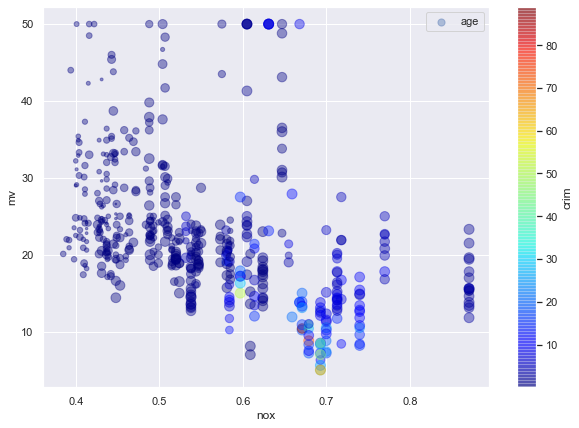

In [12]:
boston_prelim.plot(kind="scatter", x="nox", y="mv", alpha=0.4,
    s=boston_prelim["age"], label="age", figsize=(10,7),
    c="crim", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [13]:
boston_scaled.isnull().sum()

mv         0
crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
dtype: int64

In [14]:
#It appears we have strong coorelations with age and lstat, yet the data needs to be transformed. We will first try log10, then squaring, then cubing
boston['logAge'] = np.log10(boston['age'])
boston['logLstat'] = np.log10(boston['lstat'])
boston['logDis']= np.log10(boston['dis'])
boston['logMv'] = np.log10(boston['mv'])

In [15]:
boston['sqAge'] = np.square(boston['age'])
boston['sqLstat'] = np.square(boston['lstat'])
boston['sqDis'] = np.square(boston['dis'])

In [16]:
boston.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582,0.289668,0.395543,-0.464239,-0.530001,0.382940,0.460510,-0.293661
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386,-0.517372,-0.477706,0.590655,0.363396,-0.544613,-0.323323,0.685935
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754,0.536768,0.597429,-0.761286,-0.543195,0.681602,0.532496,-0.615039
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663,0.091245,-0.074074,-0.087037,0.158569,0.077838,-0.047605,-0.104814
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300,0.640442,0.577072,-0.831977,-0.513431,0.754618,0.530723,-0.661179
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304,-0.207919,-0.664528,0.256584,0.632536,-0.255863,-0.545322,0.158071
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999,0.946946,0.606806,-0.778243,-0.455029,0.982112,0.523764,-0.664043
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315,-0.677360,-0.480612,0.964671,0.342527,-0.748234,-0.448110,0.967552
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766,0.391323,0.460506,-0.560335,-0.486818,0.476367,0.451766,-0.405848
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979,0.423624,0.522385,-0.619008,-0.566214,0.540039,0.494704,-0.425147


In [17]:
#It appears the log of age is the best transformation. We will utilize it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff37fe92c10>,
      dtype=object)

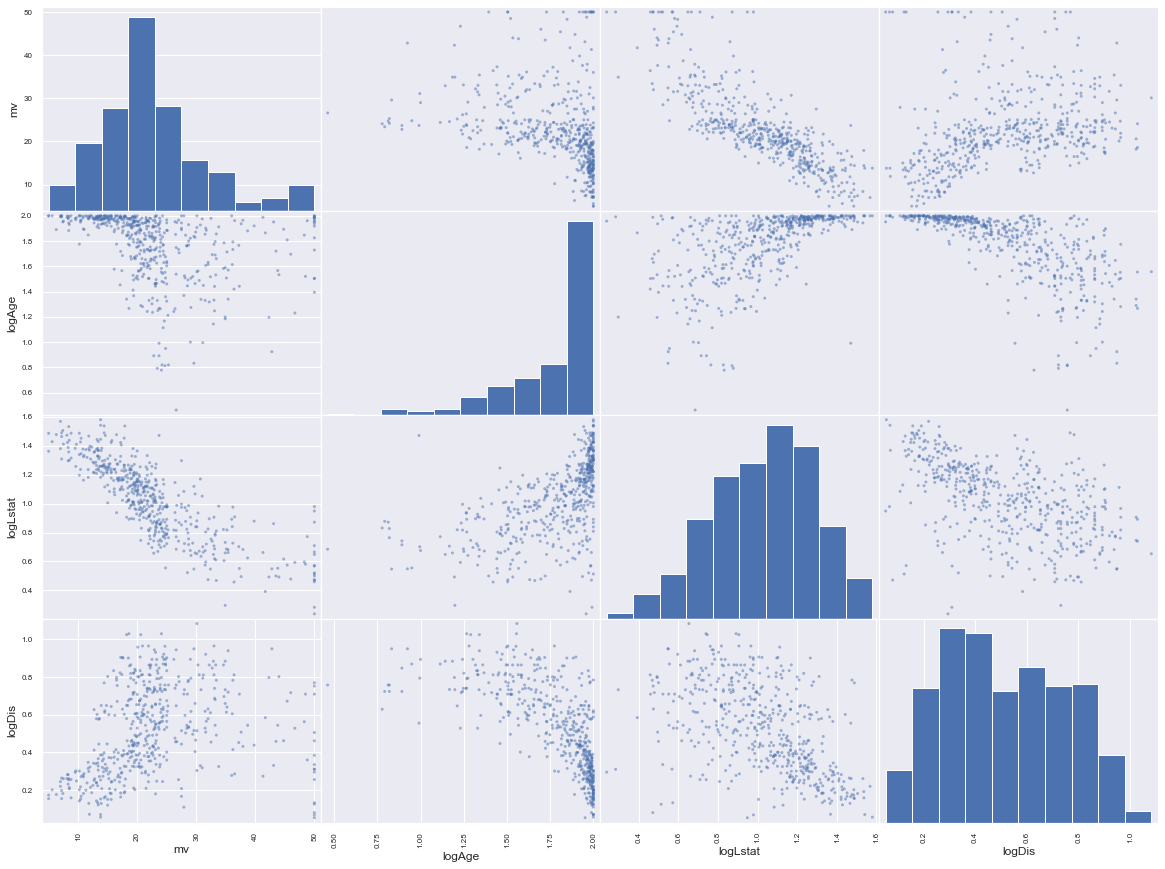

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston[['mv', 'logAge','logLstat','logDis']], figsize=(20,15))

In [19]:
#TODO
#convert log age and check coorelation
#convert log lstat and check coorelation
#convert log dis and check coorelation
#convert sqrt variables



In [20]:
boston['mv'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: mv, dtype: float64

In [21]:
# Calculated the Lower & Upper bound of Outliers for 'mv'

Q1 = boston['mv'].quantile(0.25)
Q3 = boston['mv'].quantile(0.75)
IQR = Q3 - Q1
L_Out = Q1 - 1.5 * IQR
U_Out = Q3 + 1.5 * IQR
print('L_Outlier=', L_Out)
print('U_Outlier=', U_Out)

L_Outlier= 5.0624999999999964
U_Outlier= 36.962500000000006


In [22]:
# Index number along with corresponding'mv' values, which are outliers

boston['mv'][(boston['mv'] >= U_Out) | (boston['mv'] <= L_Out)]

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: mv, dtype: float64

In [23]:
# replace the 'mv' values below or above the outliers with NaN and test by checking for Index 405 for NaN, seen above

boston.loc[(boston['mv'] >= U_Out) | (boston['mv'] <= L_Out),'mv'] = np.nan
boston['mv'].tail(101)

405     NaN
406    11.9
407    27.9
408    17.2
409    27.5
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 101, dtype: float64

In [24]:
# replace the NaN with the median value.
boston['mv'].fillna(boston['mv'].quantile(0.50), inplace = True)
boston['mv'].tail(105)

401     7.2
402    12.1
403     8.3
404     8.5
405    20.6
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 105, dtype: float64

In [25]:
boston.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,20.738142,1.776613,1.029697,0.515956,1.317892,5493.309545,210.993989,18.827601
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,6.209749,0.265241,0.260964,0.234322,0.177311,3449.600164,236.061920,21.136892
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.600000,0.462398,0.238046,0.052925,0.698970,8.410000,2.992900,1.275996
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.100000,1.653454,0.841979,0.322255,1.231086,2027.252500,48.303700,4.410735
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,20.600000,1.889300,1.055378,0.506158,1.326336,6006.290000,129.050000,10.287804
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,23.800000,1.973474,1.229298,0.715022,1.397940,8850.107500,287.472100,26.921407
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,36.500000,2.000000,1.579441,1.083735,1.698970,10000.000000,1441.720900,147.052002


In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state = 42)


In [27]:
train_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91,12.0,1.988113,1.396374,0.322364,1.079181,9467.29,620.5081,4.412940
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47,19.9,1.752048,0.927883,0.653077,1.298853,3192.25,71.7409,20.237402
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83,19.4,1.367356,0.893762,0.822214,1.287802,542.89,61.3089,44.098896
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29,13.4,1.929930,1.367169,0.305738,1.127105,7242.01,542.4241,4.087675
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28,18.2,1.841985,1.052309,0.579383,1.260071,4830.25,127.2384,14.413412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,18.66,19.5,1.963316,1.270912,0.344589,1.290035,8445.61,348.1956,4.888521
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,13.00,21.1,1.624282,1.113943,0.646306,1.324282,1772.41,169.0000,19.616041
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,5.99,24.5,1.472756,0.777427,0.921374,1.389166,882.09,35.8801,69.622336
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,23.27,13.4,1.975891,1.366796,0.327298,1.127105,8949.16,541.4929,4.514350


In [28]:
len(train_set) # we have 404 training observations

404

In [29]:
len(test_set) # we have 102 test obsevations

102

In [30]:
train_set.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'mv', 'logAge', 'logLstat', 'logDis',
       'logMv', 'sqAge', 'sqLstat', 'sqDis'],
      dtype='object')

In [31]:
len(train_set.columns) # we have 20 factors, but looking at the 
# correlation matrix, we only see a linear relationship with a 
# few of these 'mv', 'logAge','logLstat','logDis'



20

In [32]:
corr_matrix = train_set.corr()

In [33]:
corr_matrix['mv'].sort_values(ascending=False)

mv          1.000000
logMv       0.786249
logDis      0.493923
rooms       0.454962
dis         0.434487
zn          0.413810
sqDis       0.361374
chas        0.060242
crim       -0.440763
logAge     -0.456481
ptratio    -0.457034
rad        -0.505851
age        -0.523240
sqAge      -0.543644
nox        -0.555807
tax        -0.564177
indus      -0.590773
sqLstat    -0.664997
logLstat   -0.684154
lstat      -0.719460
Name: mv, dtype: float64

In [34]:
attributes = ['logDis', 'rooms','zn','sqDis','crim','rad',
             'logAge','tax','sqLstat','indus','lstat','logLstat']

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

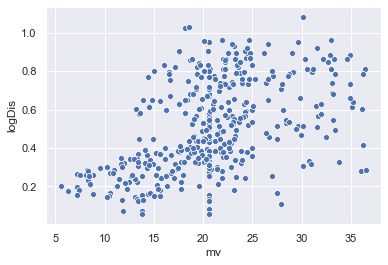

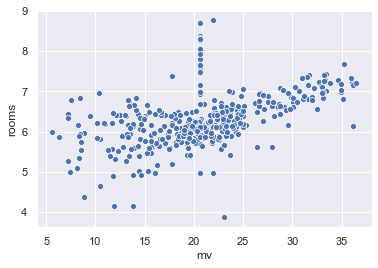

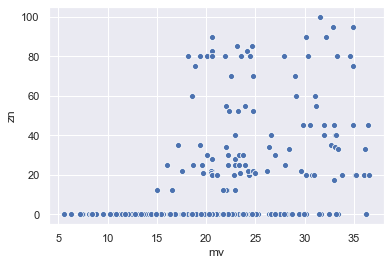

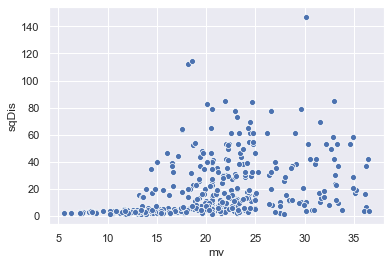

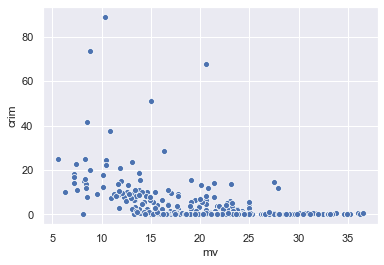

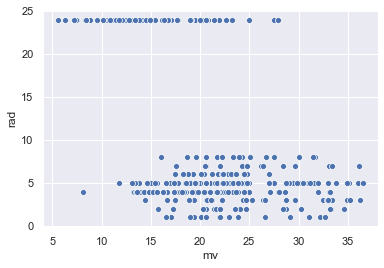

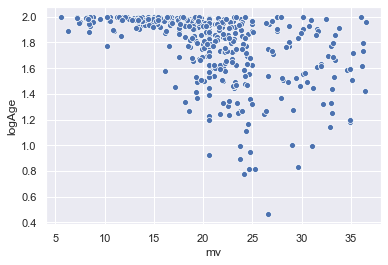

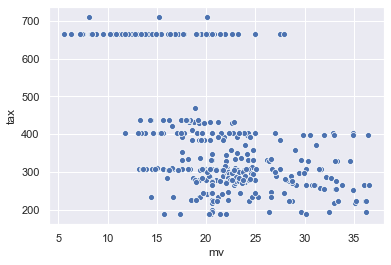

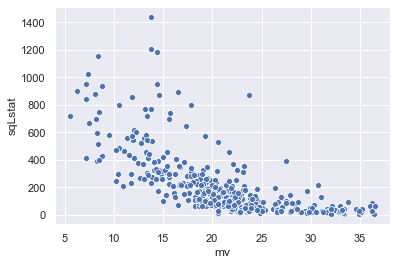

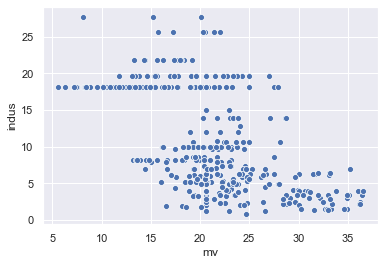

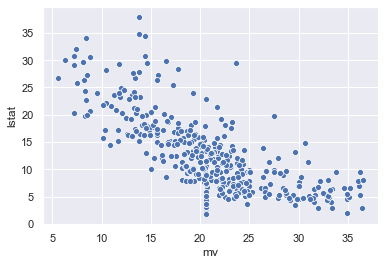

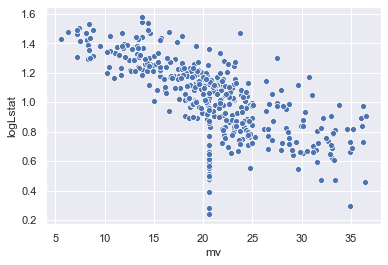

In [36]:
for j in attributes:
    sns.scatterplot(x=train_set['mv'],y=train_set[j])
    plt.show()
        

#### after looking at the features with the highest correlations, logDis, rooms, logAge, sqLstat,lstat appear to have the most linear relationships with mv

#### Let's create a training set with just these features 


In [37]:
def train_attributes(data,attribute_list):
    return data[attribute_list]

In [38]:
def labels(data,label):
    return data[label]

In [39]:
train_predictors = ['logDis','rooms','logAge','sqLstat','lstat']
train_predictors_df = train_attributes(train_set,train_predictors)
train_predictors_df

,logDis,rooms,logAge,sqLstat,lstat
477,0.322364,5.304,1.988113,620.5081,24.91
15,0.653077,5.834,1.752048,71.7409,8.47
332,0.822214,6.031,1.367356,61.3089,7.83
423,0.305738,6.103,1.929930,542.4241,23.29
19,0.579383,5.727,1.841985,127.2384,11.28
...,...,...,...,...,...
106,0.344589,5.836,1.963316,348.1956,18.66
270,0.646306,5.856,1.624282,169.0000,13.00
348,0.921374,6.635,1.472756,35.8801,5.99
435,0.327298,6.629,1.975891,541.4929,23.27


In [40]:
train_labels = labels(train_set,'mv')
train_labels

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: mv, Length: 404, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lin_reg = LinearRegression()

In [43]:
lin_reg.fit(train_predictors_df,train_labels)

LinearRegression()

In [44]:
lin_reg.intercept_,lin_reg.coef_

(28.932531191507813,
 array([ 2.54156272,  0.22185277, -1.44105062,  0.00732149, -0.78069477]))

In [45]:
# look at predictions visually using all boston data 
boston_train_vis = train_attributes(boston,train_predictors)
boston_train_vis


,logDis,rooms,logAge,sqLstat,lstat
0,0.611723,6.575,1.814248,24.8004,4.98
1,0.696103,6.421,1.897077,83.5396,9.14
2,0.696103,7.185,1.786041,16.2409,4.03
3,0.782630,6.998,1.660865,8.6436,2.94
4,0.782630,7.147,1.733999,28.4089,5.33
...,...,...,...,...,...
501,0.394206,6.593,1.839478,93.5089,9.67
502,0.359361,6.120,1.884795,82.4464,9.08
503,0.335959,6.976,1.959041,31.8096,5.64
504,0.378198,6.794,1.950851,41.9904,6.48


In [46]:
boston_train_labs = labels(boston,'mv')
boston_train_labs

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 506, dtype: float64

In [47]:
boston_train_vis = boston_train_vis.iloc[:5]
boston_train_labs = boston_train_labs.iloc[:5]
test= lin_reg.predict(boston_train_vis)
print(test)
labs =(boston_train_labs)
print(labs)

[25.62523963 22.86853727 26.69466441 27.84881095 26.05532846]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: mv, dtype: float64


In [89]:
print('by examining this we seem to have some variability error')
labs-test


by examining this we seem to have some variability error


0    -1.625240
1    -1.268537
2     8.005336
3     5.551189
4    10.144672
Name: mv, dtype: float64

In [51]:
# let's calculate the overall MSE
from sklearn.metrics import mean_squared_error

In [57]:
training_predictions = lin_reg.predict(train_predictors_df)
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.267599041021507

#### we have a typical prediction error of 4.26- need to clarify is that 4,200 or 42,000? not sure how this was scaled


#### Let's use cross validation!

In [69]:
from sklearn.model_selection import cross_validate
from sklearn import linear_model

In [70]:
regr = linear_model.LinearRegression()

In [71]:
scores = cross_val_score(regr, train_predictors_df, train_labels,
                        scoring = 'neg_mean_squared_error', cv=10)

In [72]:
lr_rmse_scores = np.sqrt(-scores)

In [75]:
def display_scores(scores):
    print(f'scores:{scores}')
    print(f'mean: {scores.mean()}')
    print(f'standard deviation: {scores.std()}')

In [76]:
display_scores(scores)

scores:[-23.81708201 -13.41813874 -20.68160648 -15.04862435 -19.62128805
 -19.7806127  -22.82958008 -19.55900199 -23.84245673 -11.38676967]
mean: -18.998516080697293
standard deviation: 4.125370130085494


accuracy of the model is 4.125 for cross validation is very similar to train rmse. The model seems to be performing well.Next we will 

#### when we examined correlates we saw that there may be some multicollinearity. When your multipe regression suffers from multicollinearity the least squares are unbiased, but the variances tend to be large. Looking at our first examination of the full test set we say some predictions that were pretty accurate, and others that have high variance. 

#### We also see large positive and negative coefficients which can be a result of correlated variables and have implications for prediction 

#### Implementing ridge regression can help us by imposing restrictions on our coefficients

#### Let's implement ridge regression on our data! We will use grid search that will allow us to automatically perform cross validation with a range of reguarlization paramters to find  optimal value of alpha 


In [82]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [83]:
ridge= Ridge()

In [84]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regression.fit(train_predictors_df,train_labels)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [86]:
ridge_regression.best_params_

{'alpha': 10}

In [87]:
ridge_regression.best_score_

-18.916658469679554

#### overall implementing ridge we found the best alpha level is 10 & that MSE is -18.91 which is a very slight improvement from the basic multiple linear regression

#### Now that we have our two models, let's see how they perform on our test data 